In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
import seaborn as sns
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

# My packages
from source import parse_mxml as pm
from source import log_representation as lr
from source import plots as plts
from source import drift_detection as dd
from source import drift_localization as dl
from source import offline_streaming_clustering as off_sc
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan

from sklearn.base import clone as sk_clone 

import random
random.seed(42)

import os
import glob

import gc
gc.enable()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

In [2]:
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

def if_any(string, lista):
    for l in lista:
        if l in string:
            return True
    return False

In [3]:
logs = insensitive_glob("../../../../../../../Datasets/Business_Process_Drift_Logs/Logs/*/*k.MXML")

In [4]:
logs = [x for x in logs if "2.5" not in x]

### Read and Prep log file

In [5]:
logs[0]
# logs[39]
# logs[24]

'../../../../../../..\\Datasets\\Business_Process_Drift_Logs\\Logs\\cb\\cb10k.mxml'

In [38]:
log_read = pm.all_prep(logs[39])
tokens = lr.get_traces_as_tokens(log_read)
y_true = list(range(int(len(tokens)/10), len(tokens), int(len(tokens)/10)))
print(len(tokens))
print(len(tokens.unique()))

10000
101


### Vector space representations

### Trace Clustering - Transitions Binary

In [40]:
# run_df = off_sc.run_offline_clustering_window(
# #     KMeans(n_clusters=3, random_state=42),
#     DBSCAN(eps=2, min_samples=3, metric='euclidean'),
#     75,
#     transitions_binary,
#     sliding_window=False,
#     sliding_step=1
# )

##### Features from the evolution of trace clustering

In [41]:
# run_df['std_diff_centroids'].plot(figsize=(16,4), c='red')
# plts.plot_drift_vertical_lines(len(activity_binary), label="True drift")
# plt.legend();

In [42]:
# run_df['avg_dist_intra_cluster'].plot(figsize=(16,4), c='red')
# plts.plot_drift_vertical_lines(len(activity_binary), label="True drift")
# plt.legend();

### Trace Clustering - Activity Binary

In [43]:
# clustering_window_size = 125

# run_df = off_sc.run_offline_clustering_window(
# #     KMeans(n_clusters=3, random_state=42),
#     DBSCAN(eps=2, min_samples=3, metric='euclidean'),
#     clustering_window_size,
#     activity_binary,
#     sliding_window=False,
#     sliding_step=1
# )

##### Features from the evolution of trace clustering

In [44]:
# run_df['avg_dist_between_centroids'].plot(figsize=(16,4))
# plts.plot_drift_vertical_lines(len(activity_binary), label="True drift")
# plt.legend();

In [45]:
# run_df['Silhouette'].plot(figsize=(16,4))
# plts.plot_drift_vertical_lines(len(activity_binary), label="True drift")
# plt.legend();

### Trace Clustering

In [46]:
clustering_window_size=125

In [47]:
# model = DBSCAN(eps=0.1, min_samples=3, metric='euclidean', )#, metric='manhattan', 'cosine', 'euclidean')
# model = DBSCAN(eps=0.5, min_samples=3, metric='cosine')#, metric='manhattan', 'cosine', 'euclidean')
# model = DBSCAN(eps=0.5, min_samples=3, metric='euclidean')
# model= hdbscan.HDBSCAN(gen_min_span_tree=True, metric='euclidean') #, min_cluster_size=5, allow_single_cluster=True
# model= hdbscan.HDBSCAN(gen_min_span_tree=True, metric='cosine')
model= hdbscan.HDBSCAN(gen_min_span_tree=True, metric='manhattan')
# model=KMeans(n_clusters=2)

In [48]:
# X=vector_representation[0:250]
# test=model.fit_predict(X)
# test

# from DBCV import DBCV
# from scipy.spatial.distance import euclidean
# DBCV.DBCV(X, test, dist_function=euclidean)

In [49]:

# "activity_binary": lr.get_binary_representation,
# "activity_frequency": lr.get_frequency_representation,

# "transitions_binary": lr.get_binary_transitions_representation,
# "transitions_frequency": lr.get_frequency_transitions_representation,

# "activity_tfidf": lr.get_tfidf_representation,
# "transitions_tfidf": lr.get_tfidf_transitions_representation,

# "activity_transitions_frequency": lr.get_activity_transitions_frequency_representation,
# "activity_transitions_binary": lr.get_activity_transitions_binary_representation

In [53]:
run_df = off_sc.run_offline_clustering_window(
    tokens,
    lr.get_activity_transitions_frequency_representation,
    model,
    clustering_window_size,
#     activity_binary,
    sliding_window=False,
    sliding_step=1
)

resp_1["i"]:  0
resp_2["i"]:  125
resp_1["centroids"]:  (9, 117)
resp_2["centroids"]:  (10, 117)
resp_1_clusters_ind:  [0 1 3 4 5 2 7 6 8 1]
resp_2_clusters_ind:  [0 1 2 3 4 5 7 8 9 6]
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (10, 117)
list key:  volume_list
list key:  radius_list
list key:  dist_intra_cluster_list
list key:  skewness_list
list key:  cluster_std_list
list key:  wcss_list
######################################################
resp_1["i"]:  125
resp_2["i"]:  250
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (13, 117)
resp_1_clusters_ind:  [0 1 4 5 3 2 6 7 8 9 9 9 9]
resp_2_clusters_ind:  [ 0  1  2  3  4  5  6  7  9 10  8 11 12]
resp_1["centroids"]:  (13, 117)
resp_2["centroids"]:  (13, 117)
list key:  volume_list
list key:  radius_list
list key:  dist_intra_cluster_list
list key:  skewness_list
list key:  cluster_std_list
list key:  wcss_list
######################################################
resp_1["i"]:  250
resp_2["i"]:  375
resp_1["centroids"

list key:  wcss_list
######################################################
resp_1["i"]:  8500
resp_2["i"]:  8625
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (10, 117)
resp_1_clusters_ind:  [0 1 2 3 4 5 6 7 8 9]
resp_2_clusters_ind:  [0 1 2 5 3 6 7 4 8 9]
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (10, 117)
list key:  volume_list
list key:  radius_list
list key:  dist_intra_cluster_list
list key:  skewness_list
list key:  cluster_std_list
list key:  wcss_list
######################################################
resp_1["i"]:  8625
resp_2["i"]:  8750
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (10, 117)
resp_1_clusters_ind:  [0 1 2 3 4 5 6 7 8 9]
resp_2_clusters_ind:  [0 1 4 3 5 2 6 8 7 9]
resp_1["centroids"]:  (10, 117)
resp_2["centroids"]:  (10, 117)
list key:  volume_list
list key:  radius_list
list key:  dist_intra_cluster_list
list key:  skewness_list
list key:  cluster_std_list
list key:  wcss_list
###################################################

In [54]:
run_df

k  \
i           
125     9   
250    10   
375    13   
500    10   
625     8   
750     9   
875     9   
1000    9   
1125    9   
1250    8   
1375   10   
1500    9   
1625   10   
1750    9   
1875   10   
2000   10   
2125    9   
2250   11   
2375   10   
2500    9   
2625    7   
2750    8   
2875   10   
3000   10   
3125   11   
3250    8   
3375    9   
3500   11   
3625   11   
3750   10   
3875   11   
4000    9   
4125   10   
4250   10   
4375    8   
4500   11   
4625    9   
4750   11   
4875   10   
5000    9   
5125    9   
5250   11   
5375    9   
5500   10   
5625   10   
5750   10   
5875   10   
6000   11   
6125   10   
6250    9   
6375    9   
6500    9   
6625    9   
6750    9   
6875    9   
7000    8   
7125    9   
7250   12   
7375   10   
7500    7   
7625   10   
7750    9   
7875    8   
8000    8   
8125   10   
8250    9   
8375   11   
8500   12   
8625   10   
8750   10   
8875   10   
9000   10   
9125   10   
9250   11   
9375   10   
9500    8   
9625    9   
9750   12   
9875   10   
10000   9   

                                                                                                    y_pred  \
i                                                                                                            
125    [2, 1, 0, 4, 5, 1, 0, 4, 0, 2, 8, 0, 5, 5, 5, 7, 1, 7, 0, 0, 2, 7, 1, 0, 0, 0, 4, 4, 5, 2, 0, 3,...   
250    [1, 1, 1, 0, 9, 9, 0, 6, 0, 8, 7, 3, 0, 0, 4, 0, 3, 5, 9, 1, 2, 0, 6, 1, 0, 5, 7, 0, 6, 9, 0, 4,...   
375    [2, 12, 0, 0, 8, 0, 1, 2, 5, 9, 12, 9, 0, 9, 4, 0, 5, 8, 4, 0, 0, 12, 4, 4, 0, 4, 5, 0, 12, 1, 2...   
500    [2, 0, 0, 8, 5, 0, 0, 2, 3, 5, 0, 5, 8, 0, 1, 0, 5, 9, 0, 5, 3, 0, 3, 6, 1, 1, 1, 0, 0, 4, 5, 1,...   
625    [0, 4, 2, 1, 5, 2, 2, 6, 0, 0, 0, 5, 1, 2, 1, 4, 0, 2, 3, 1, 4, 2, 6, 5, 0, 0, 0, 0, 4, 0, 0, 0,...   
750    [7, 2, 3, 7, 0, 5, 4, 5, 4, 6, 4, 0, 4, 8, 4, 4, 1, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 4, 5, 8, 0,...   
875    [5, 1, 6, 5, 2, 1, 7, 6, 0, 0, 2, 2, 0, 5, 5, 0, 1, 4, 3, 0, 5, 2, 3, 5, 1, 0, 5, 0, 0, 4, 5, 6,...   
1000   [5, 3, 5, 0, 0, 1, 3, 1, 0, 0, 4, 1, 0, 0, 5, 5, 0, 5, 7, 1, 0, 1, 6, 3, 4, 0, 1, 0, 0, 6, 5, 3,...   
1125   [1, 5, 0, 0, 0, 0, 7, 6, 0, 7, 1, 4, 7, 0, 6, 1, 0, 0, 7, 7, 2, 0, 0, 0, 1, 0, 4, 3, 4, 0, 7, 3,...   
1250   [4, 2, 0, 3, 1, 0, 1, 0, 5, 2, 4, 5, 0, 2, 0, 5, 2, 0, 0, 4, 0, 5, 1, 0, 0, 2, 1, 6, 1, 6, 7, 1,...   
1375   [1, 4, 0, 0, 1, 0, 6, 1, 1, 4, 2, 6, 4, 0, 8, 3, 4, 7, 6, 0, 3, 4, 0, 0, 7, 0, 7, 4, 0, 9, 0, 3,...   
1500   [3, 4, 1, 0, 3, 4, 2, 6, 8, 8, 0, 0, 7, 6, 5, 0, 4, 6, 0, 0, 0, 4, 7, 1, 5, 6, 5, 0, 6, 1, 1, 3,...   
1625   [0, 2, 9, 1, 3, 0, 6, 0, 0, 5, 3, 6, 0, 0, 7, 1, 7, 0, 5, 0, 9, 0, 2, 8, 0, 2, 1, 1, 8, 1, 1, 0,...   
1750   [0, 1, 6, 5, 2, 4, 5, 6, 2, 2, 7, 2, 7, 4, 2, 0, 7, 0, 6, 6, 0, 7, 4, 0, 0, 8, 2, 1, 6, 0, 1, 6,...   
1875   [3, 3, 2, 2, 2, 0, 0, 9, 0, 0, 0, 0, 0, 7, 8, 1, 9, 1, 2, 0, 0, 5, 1, 7, 0, 0, 1, 6, 1, 0, 0, 2,...   
2000   [4, 0, 0, 5, 7, 1, 6, 1, 0, 0, 1, 6, 7, 8, 3, 1, 8, 0, 5, 5, 1, 0, 5, 0, 5, 3, 0, 0, 1, 3, 0, 8,...   
2125   [3, 0, 1, 5, 0, 5, 8, 5, 5, 5, 1, 3, 0, 0, 8, 4, 1, 0, 1, 5, 5, 3, 5, 5, 8, 6, 3, 4, 4, 5, 1, 1,...   
2250   [6, 3, 4, 8, 0, 7, 2, 0, 1, 2, 3, 4, 2, 10, 0, 0, 10, 5, 1, 3, 8, 9, 6, 7, 0, 10, 0, 0, 3, 0, 8,...   
2375   [1, 1, 2, 4, 4, 0, 6, 0, 6, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 7, 5, 3, 0, 0, 1, 5, 3, 2, 4, 0, 1, 1,...   
2500   [8, 4, 6, 2, 0, 3, 3, 3, 0, 3, 2, 2, 1, 5, 0, 0, 0, 2, 1, 0, 1, 4, 4, 0, 0, 5, 6, 1, 3, 0, 4, 0,...   
2625   [4, 3, 1, 3, 3, 3, 4, 0, 4, 0, 0, 0, 4, 4, 1, 3, 5, 4, 1, 2, 3, 3, 0, 2, 2, 5, 5, 3, 4, 4, 5, 4,...   
2750   [0, 6, 0, 6, 0, 1, 0, 6, 6, 0, 2, 0, 1, 1, 6, 1, 0, 3, 3, 0, 0, 1, 3, 0, 6, 0, 0, 1, 5, 7, 1, 2,...   
2875   [0, 2, 3, 1, 8, 3, 0, 7, 0, 6, 0, 4, 1, 1, 2, 4, 5, 3, 2, 0, 1, 2, 2, 0, 8, 1, 8, 5, 7, 9, 0, 0,...   
3000   [0, 1, 7, 0, 2, 0, 7, 9, 0, 3, 0, 4, 6, 0, 3, 7, 0, 0, 8, 0, 0, 0, 1, 6, 5, 0, 0, 0, 8, 6, 0, 1,...   
3125   [6, 0, 5, 8, 1, 8, 0, 0, 0, 7, 0, 0, 5, 0, 6, 0, 7, 0, 0, 4, 7, 4, 6, 0, 6

k


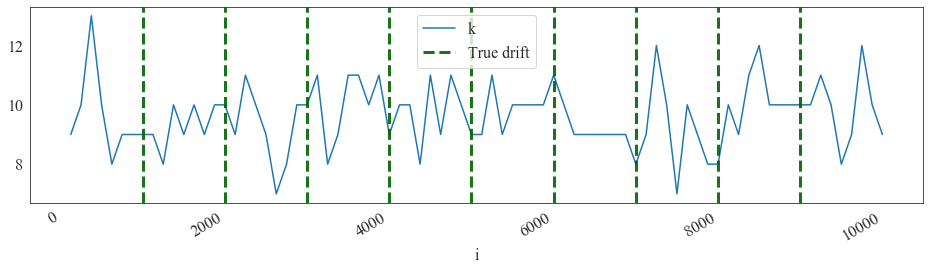

y_pred
centroids
n_variants


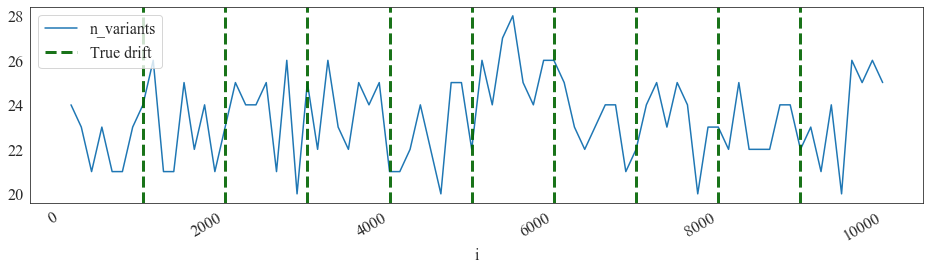

n_representation_distinct


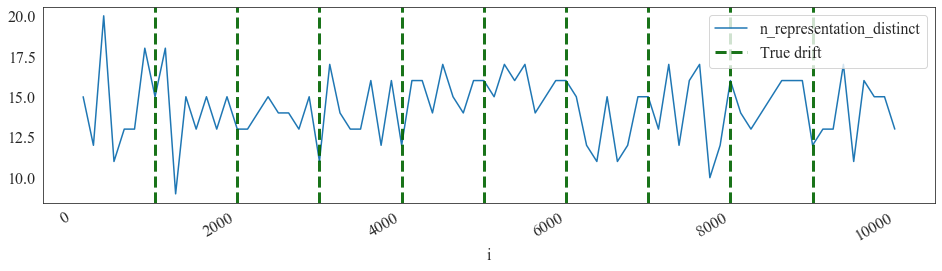

n_outliers


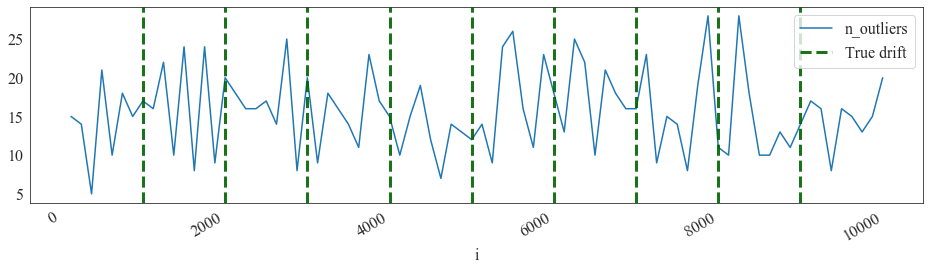

volume_list
Silhouette


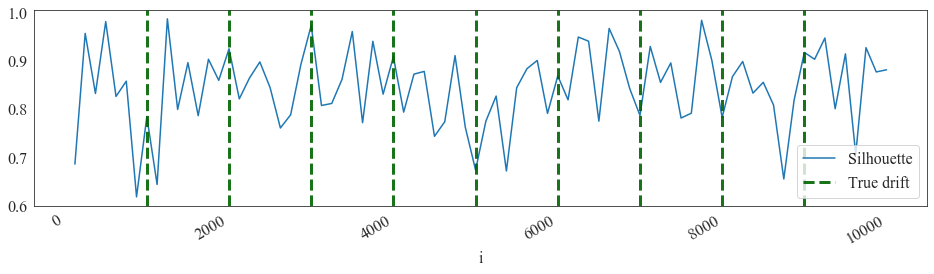

DBi


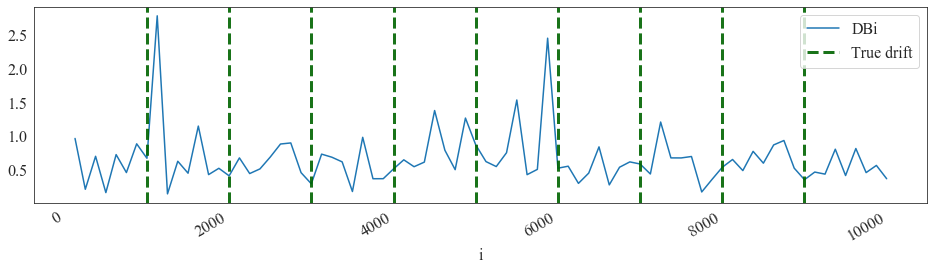

calinski_harabasz_score


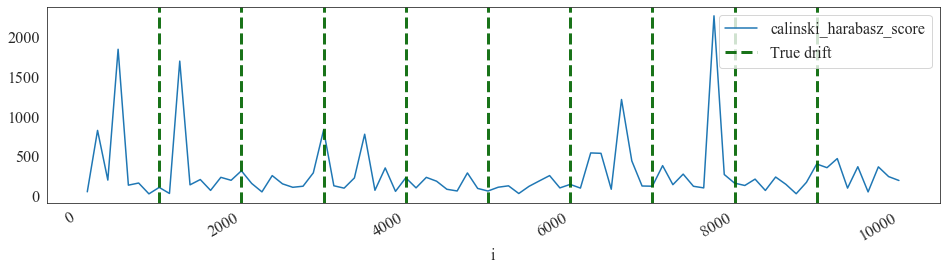

validity_index


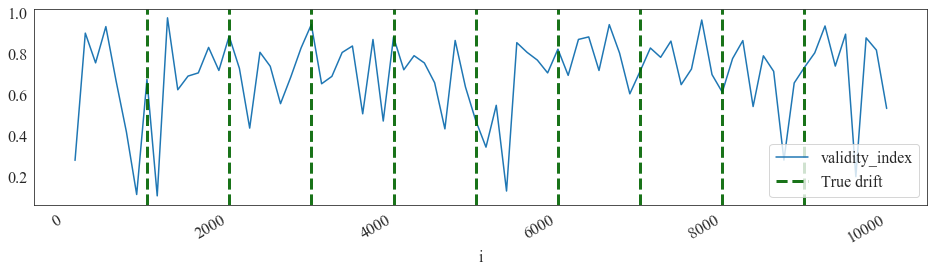

validity_index_mean


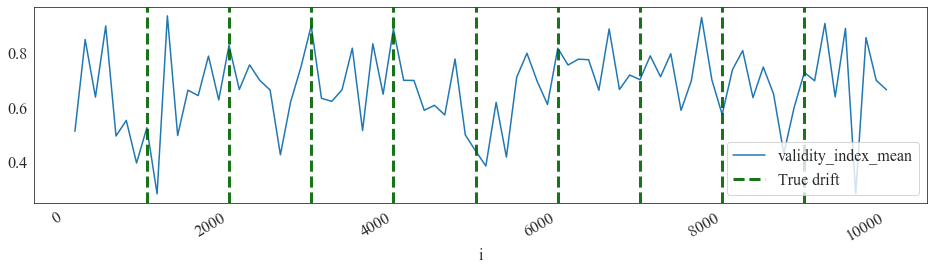

validity_index_std


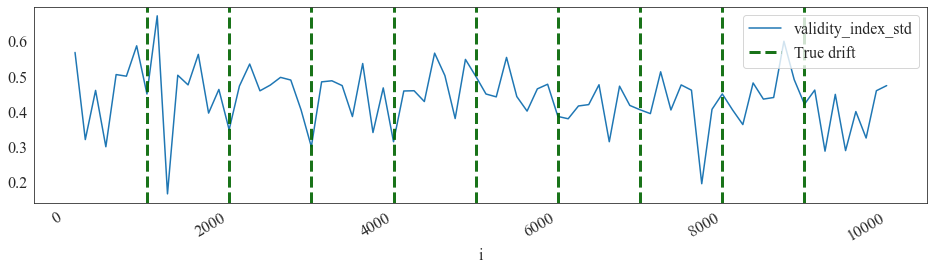

inter_dist_euclidean_mean


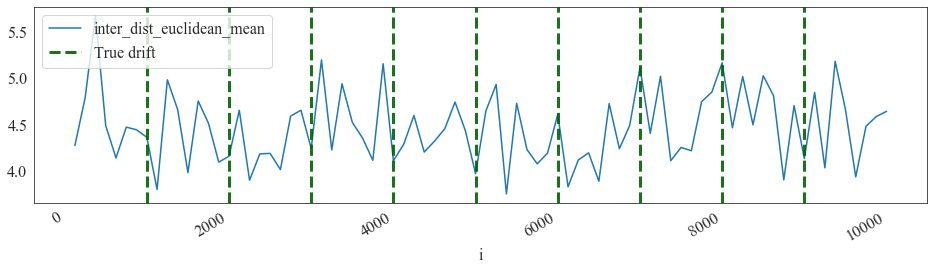

inter_dist_euclidean_std


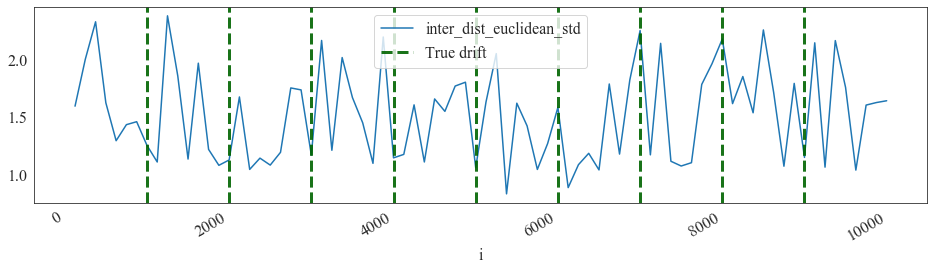

inter_dist_euclidean_max


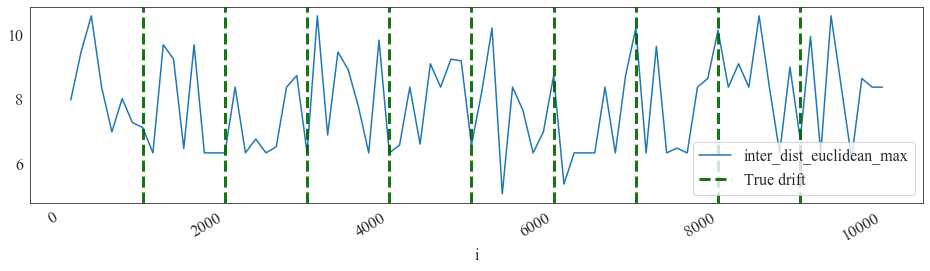

inter_dist_correlation_mean


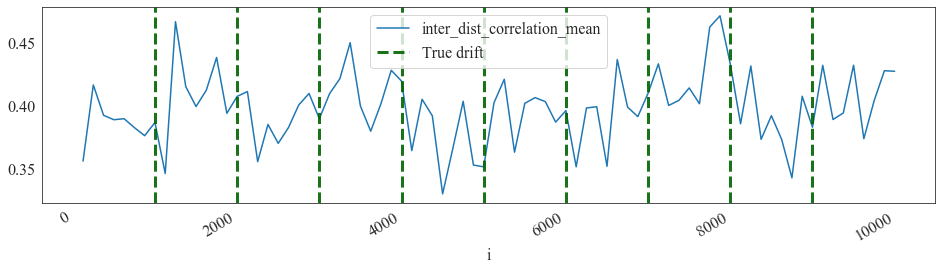

inter_dist_correlation_std


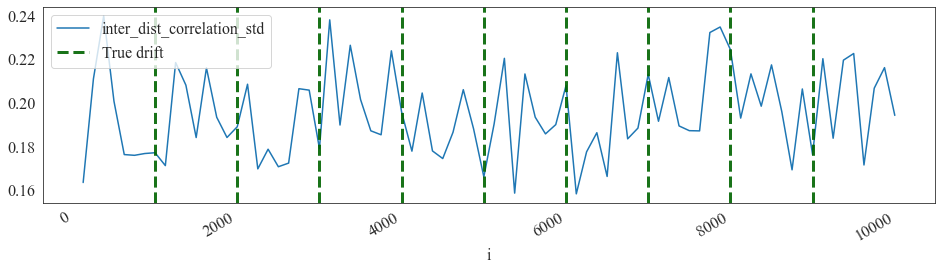

inter_dist_correlation_max


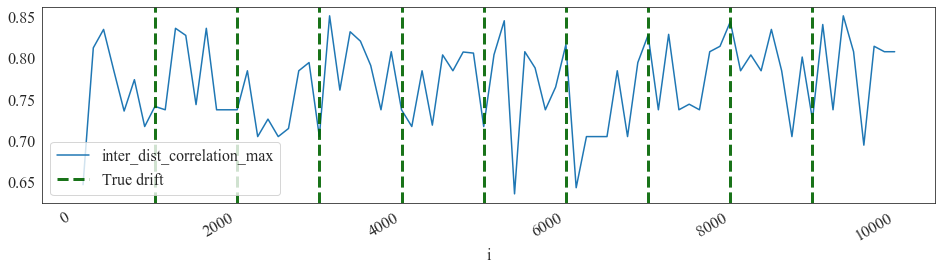

inter_dist_hamming_mean


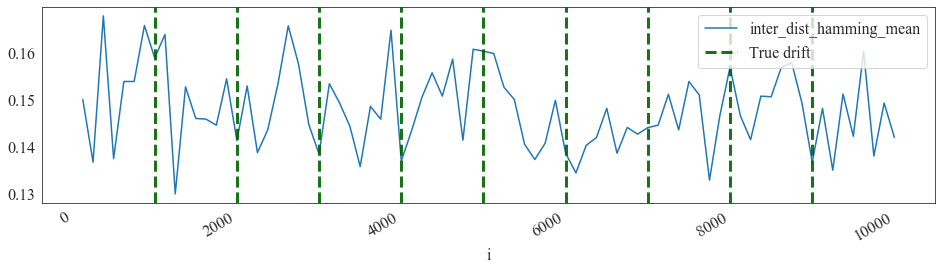

inter_dist_hamming_std


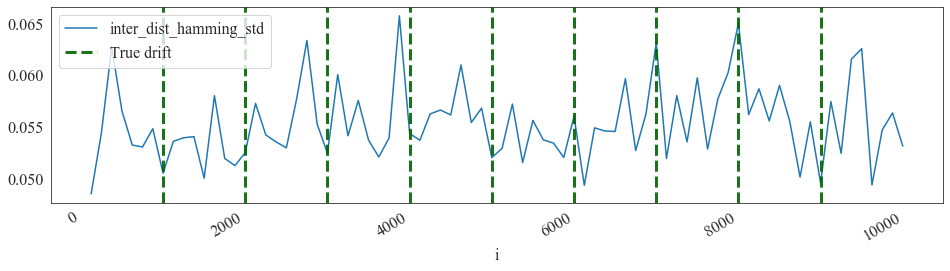

inter_dist_hamming_max


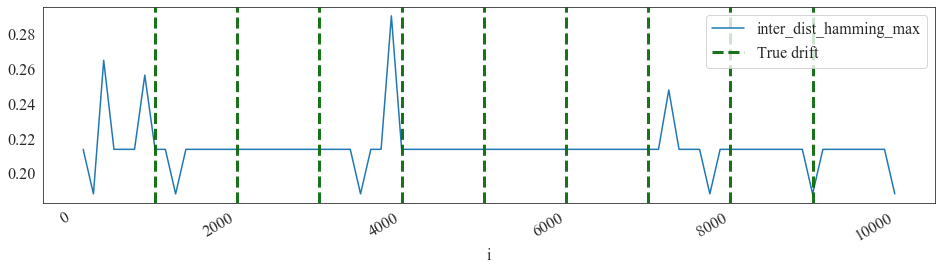

inter_dist_jaccard_mean


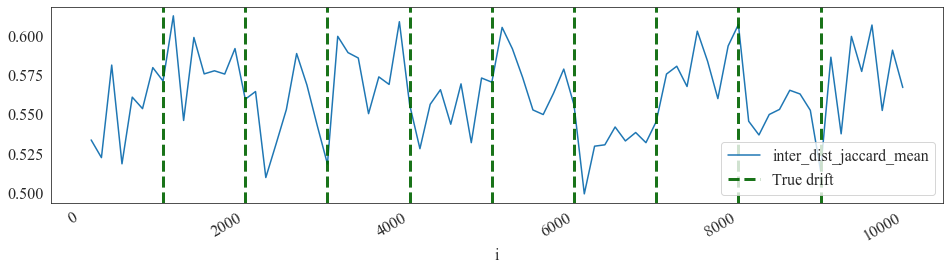

inter_dist_jaccard_std


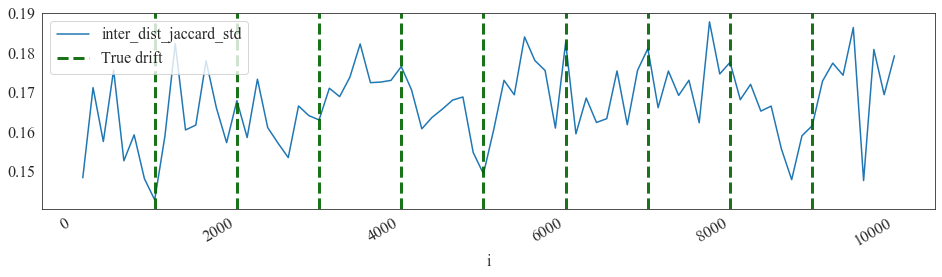

inter_dist_jaccard_max


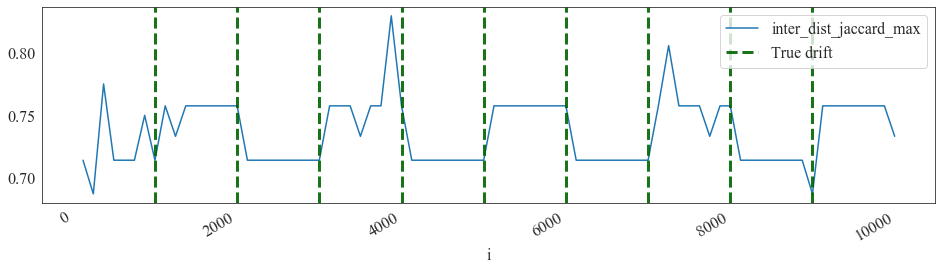

inter_dist_cosine_mean


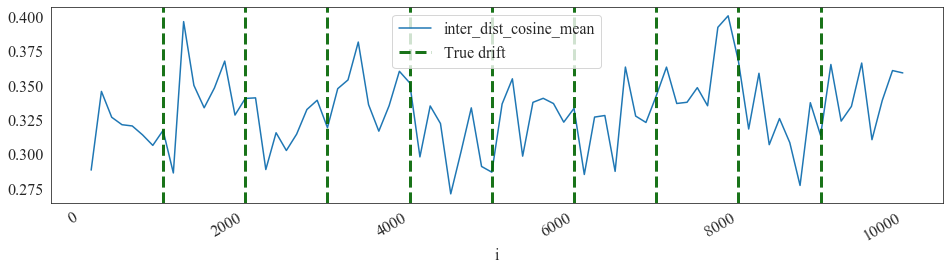

inter_dist_cosine_std


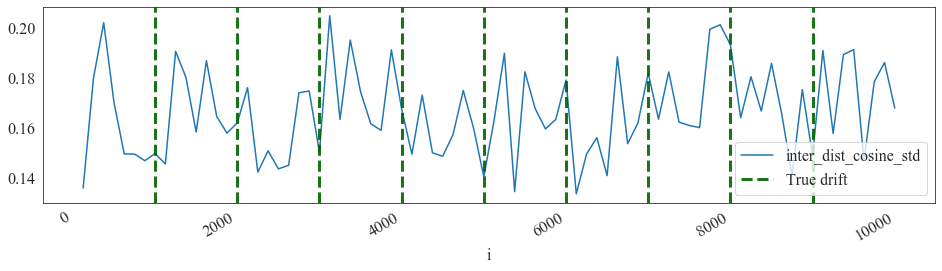

inter_dist_cosinen_max


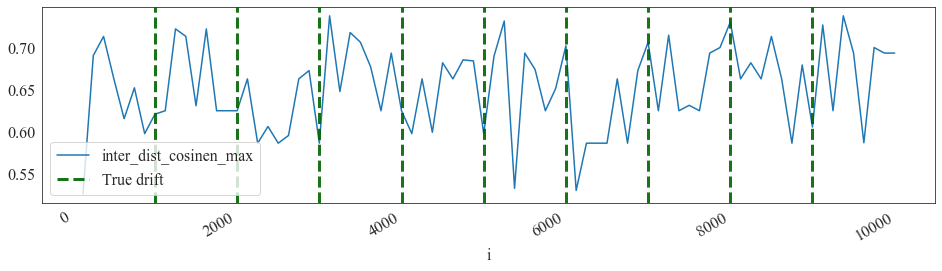

inter_dist_cityblock_mean


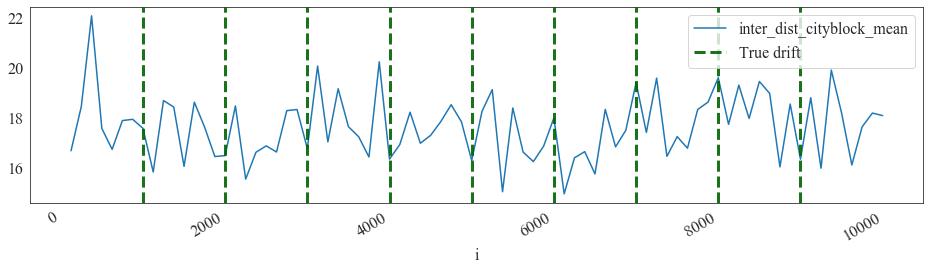

inter_dist_cityblock_std


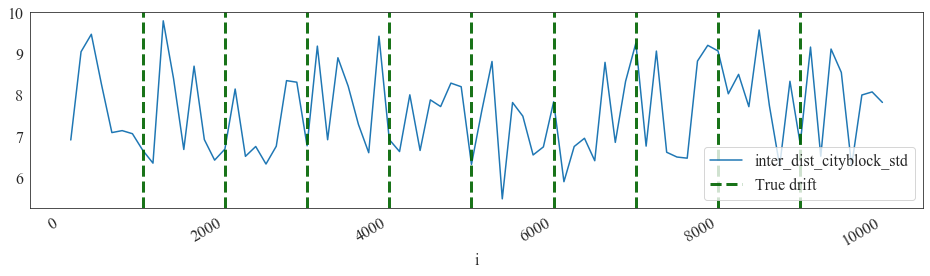

inter_dist_cityblock_max


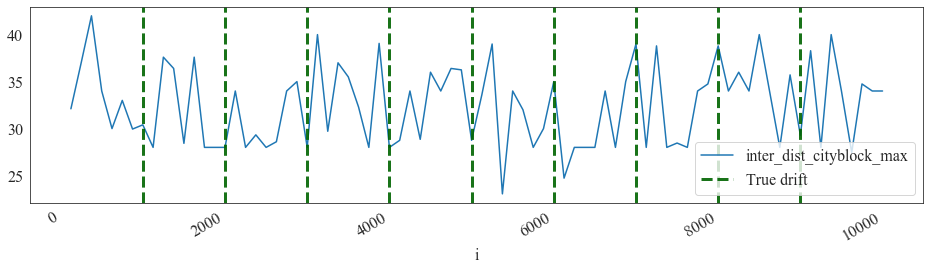

radius_list
dist_intra_cluster_list
skewness_list
cluster_std_list
wcss_list
radius_mean


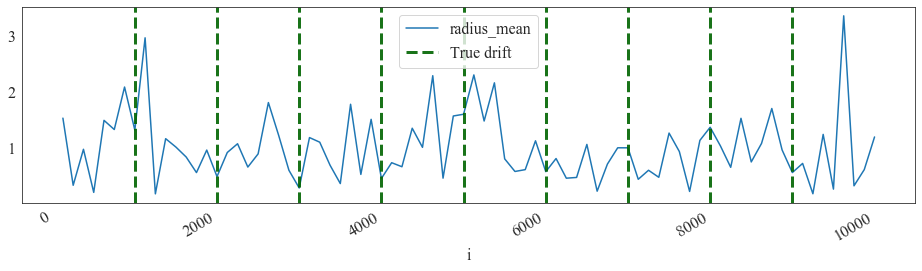

radius_std


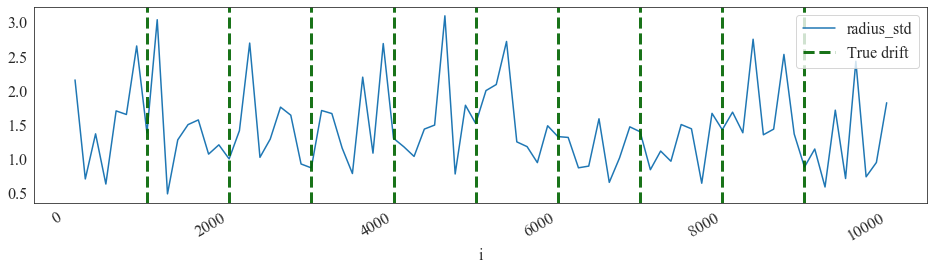

radius_sum


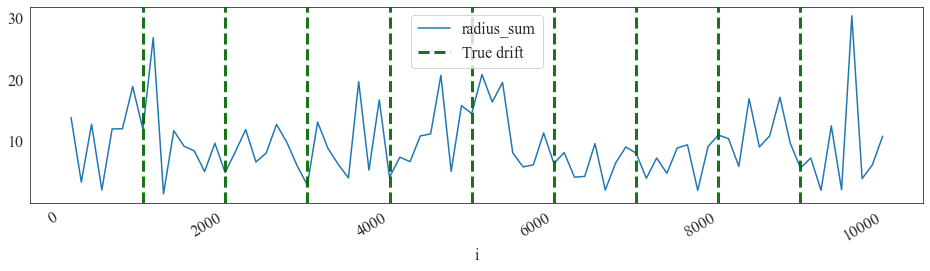

dist_intra_cluster_mean


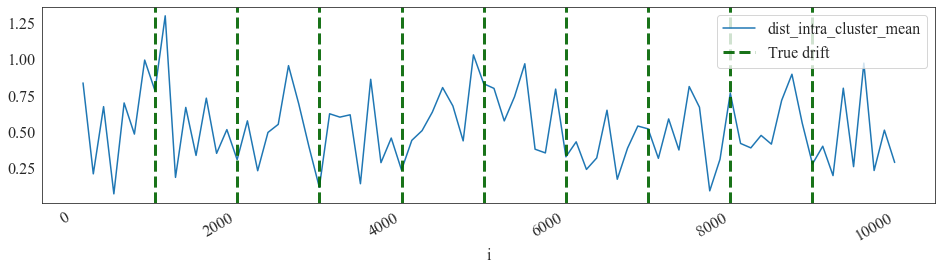

dist_intra_cluster_std


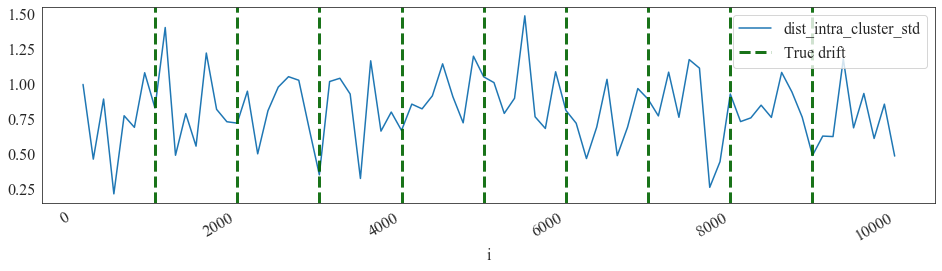

dist_intra_cluster_sum


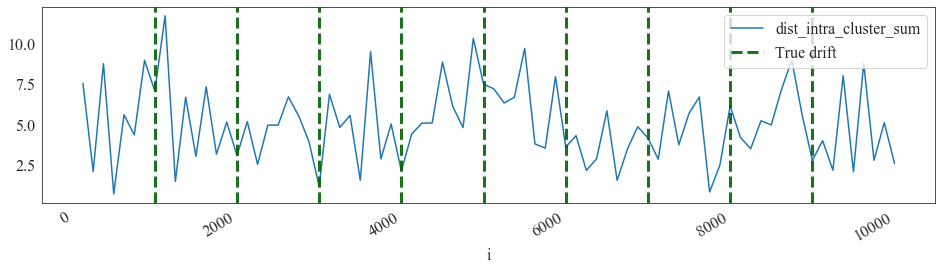

cluster_std_mean


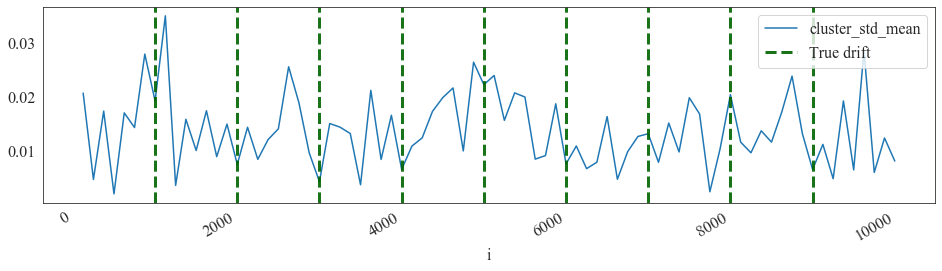

cluster_std_std


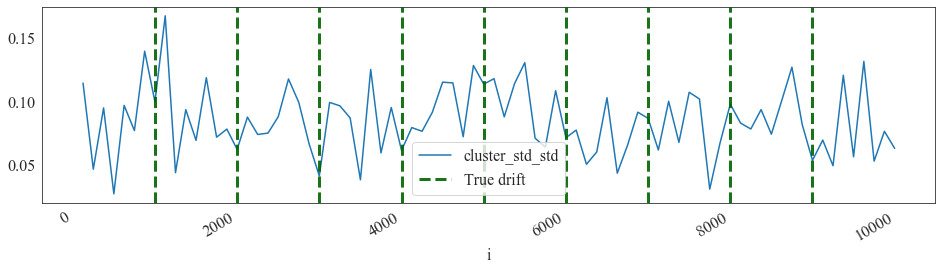

cluster_std_sum


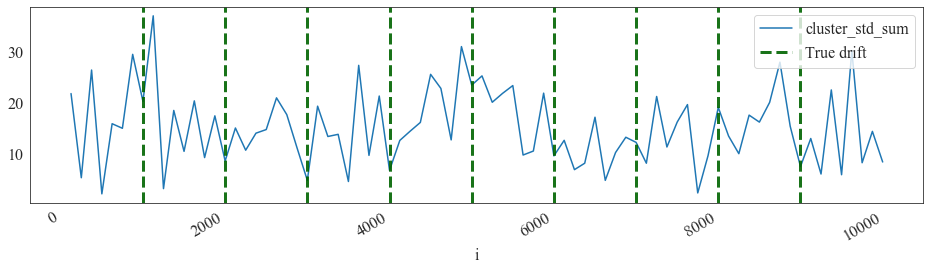

skewness_mean


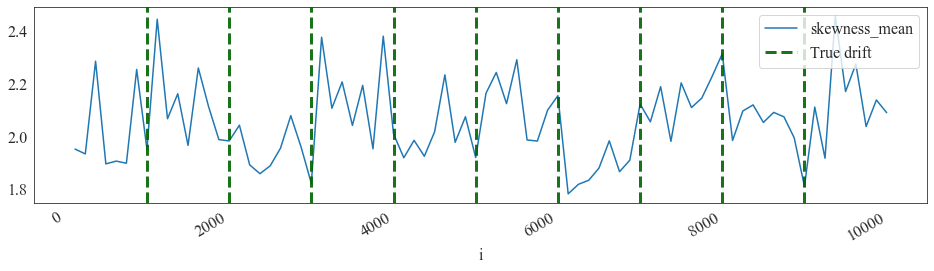

skewness_std


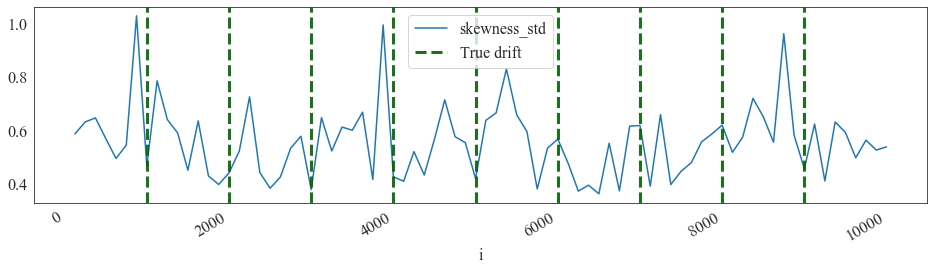

skewness_sum


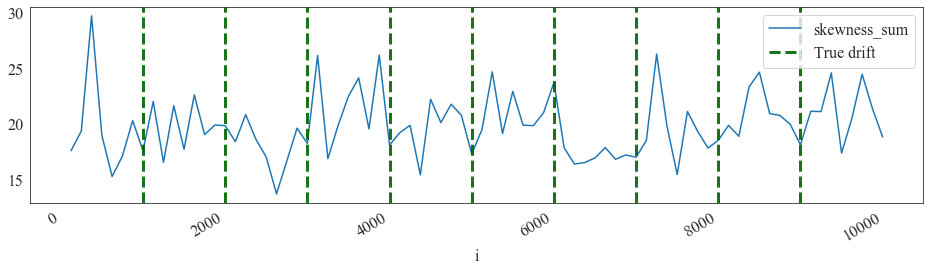

wcss_mean


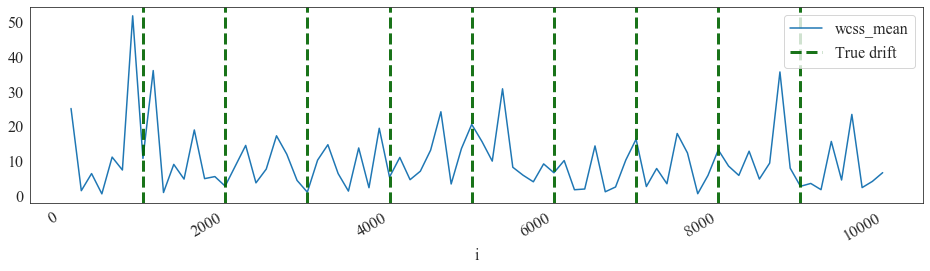

wcss_std


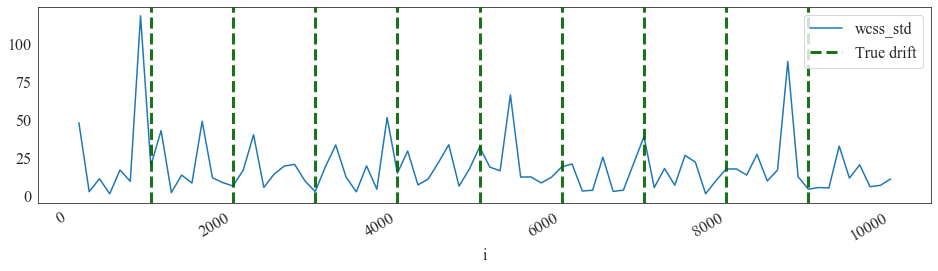

wcss_sum


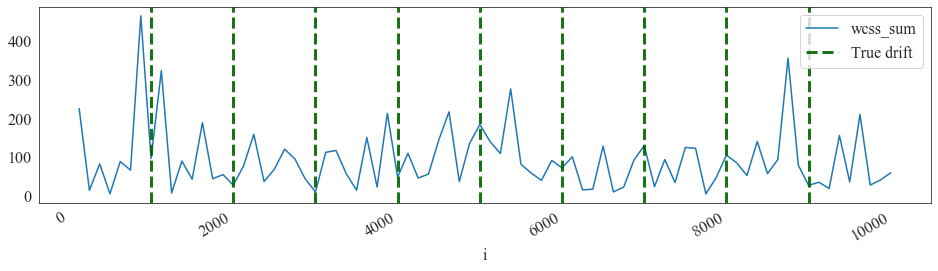

diff_k


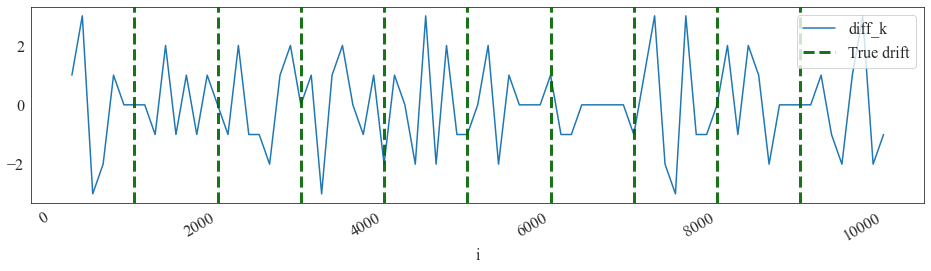

mean_diff_centroids


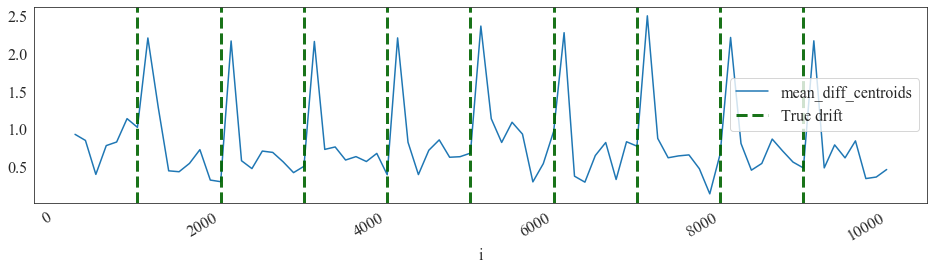

std_diff_centroids


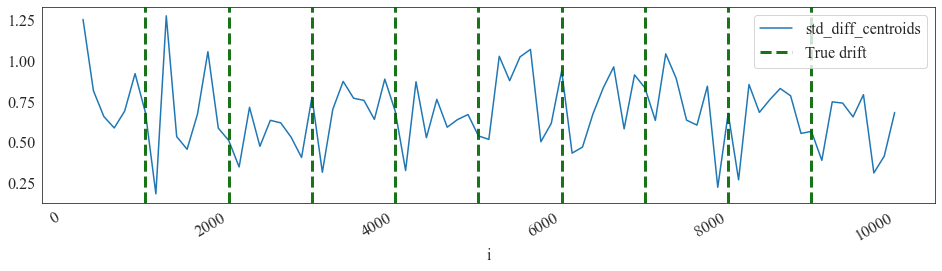

total_MSE


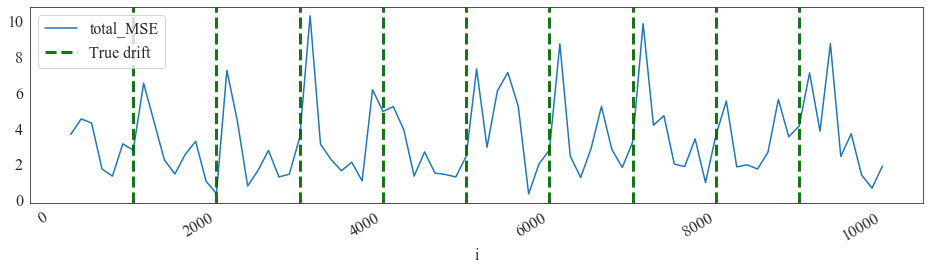

avg_MSE


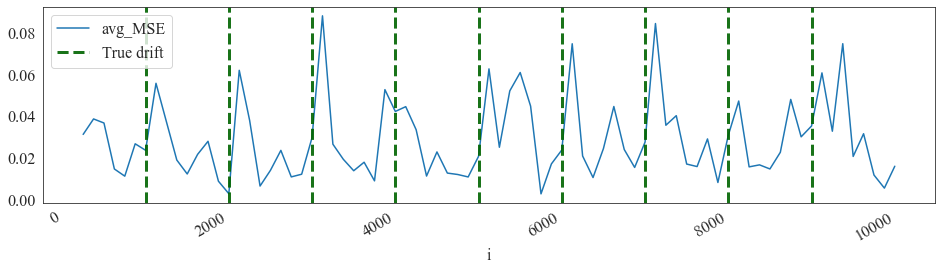

count_non_zero_MSE


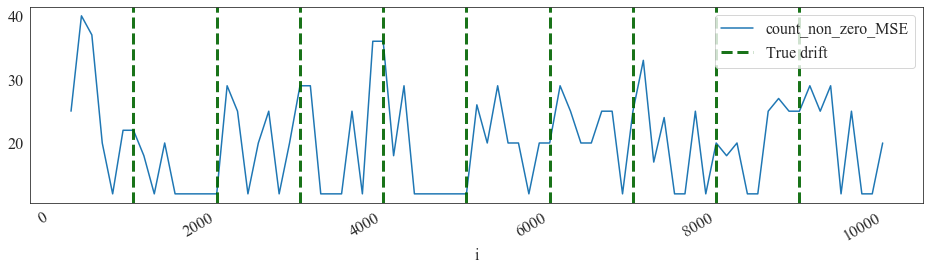

total_RMSE


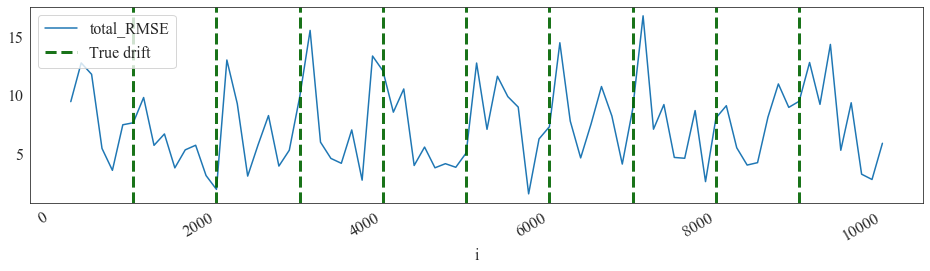

avg_RMSE


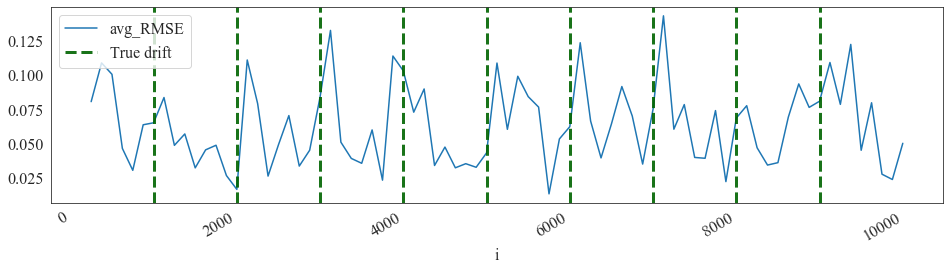

count_non_zero_RMSE


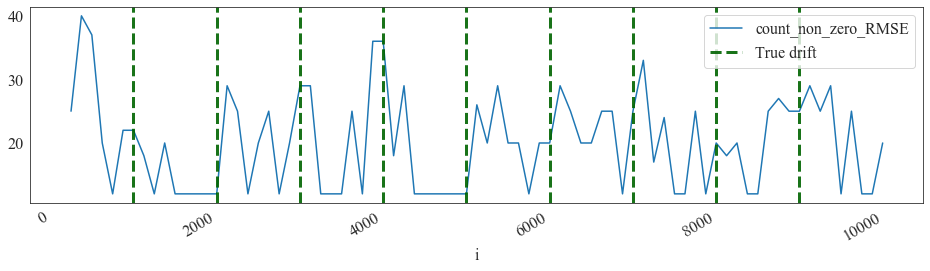

total_MAE


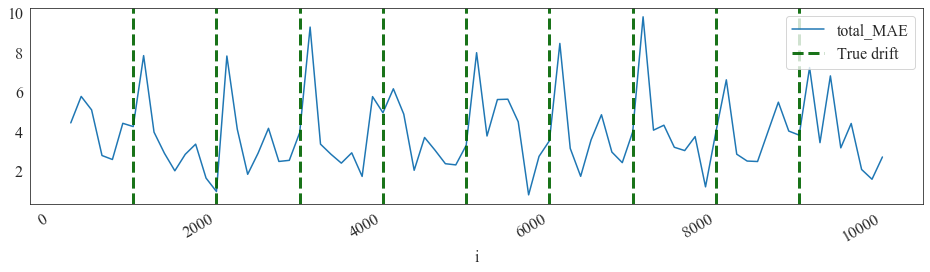

avg_MAE


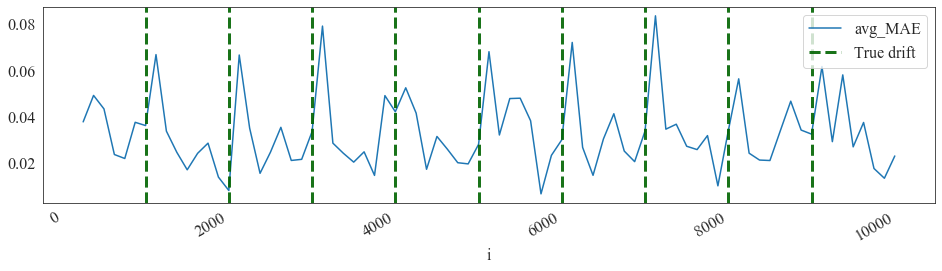

count_non_zero_MAE


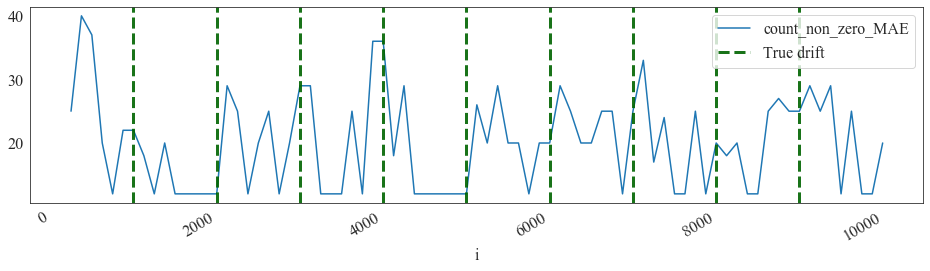

diff_n_variants


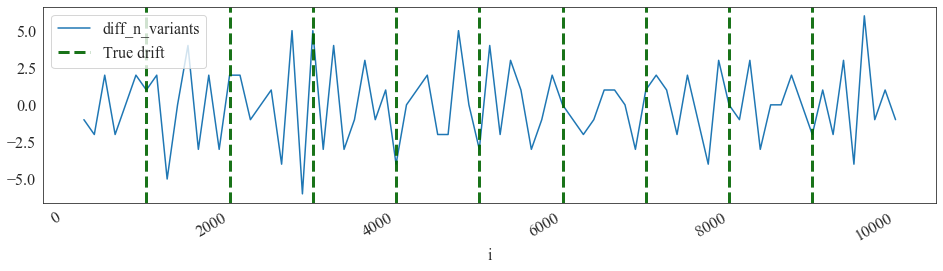

diff_n_representation_distinct


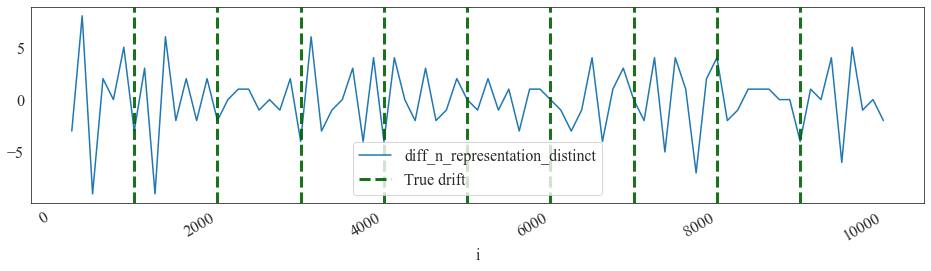

diff_n_outliers


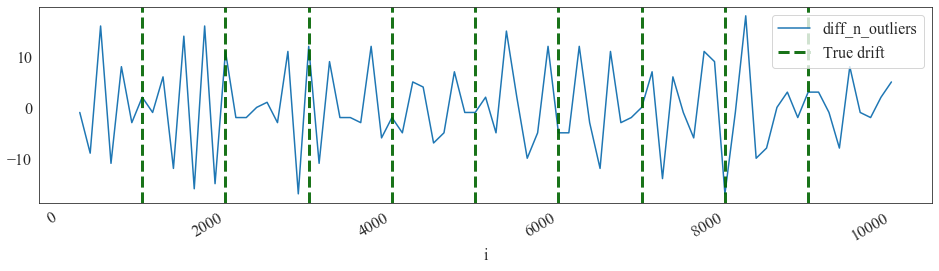

mean_diff_volume


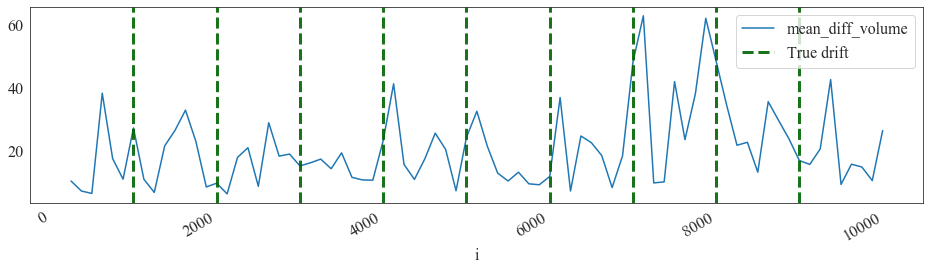

std_diff_volume


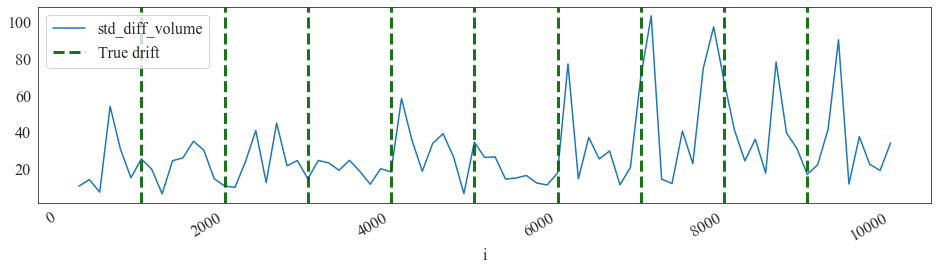

diff_Silhouette


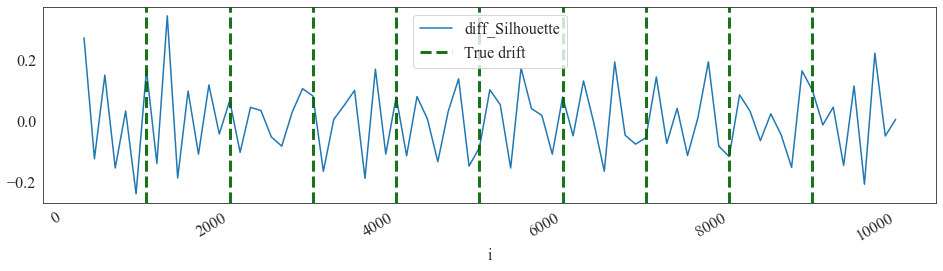

diff_DBi


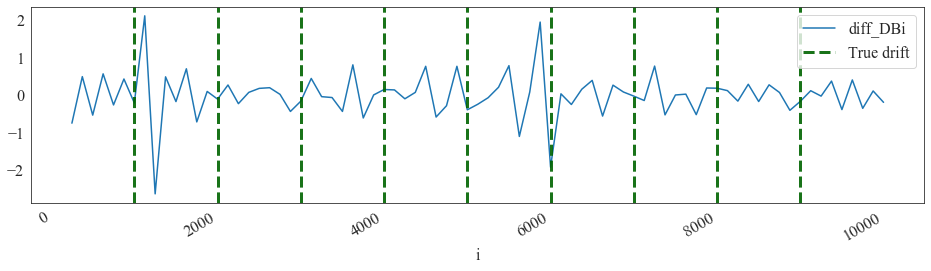

diff_calinski_harabasz_score


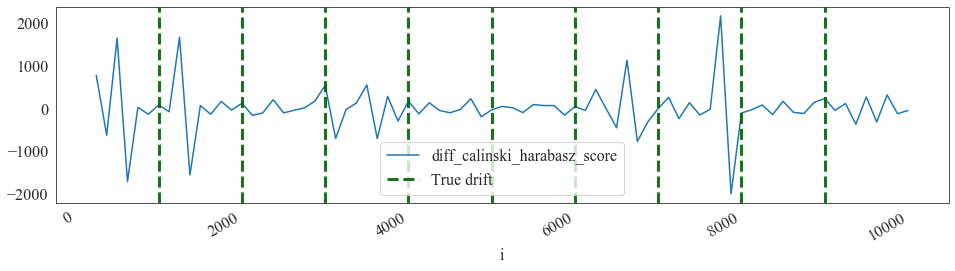

diff_validity_index


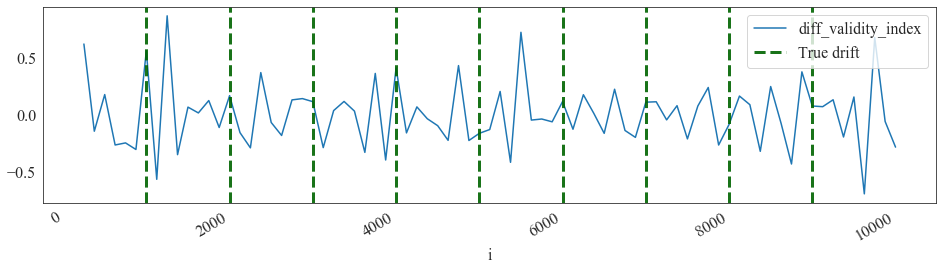

diff_validity_index_mean


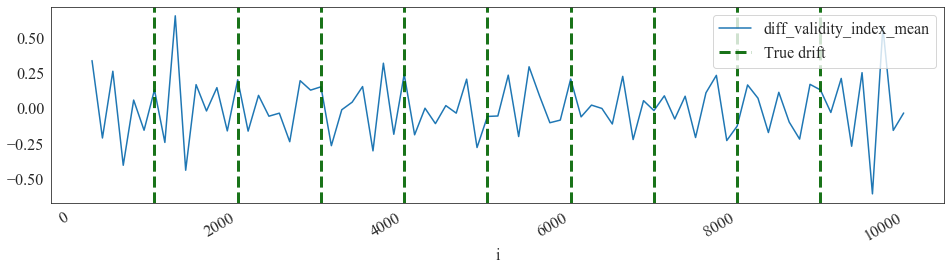

diff_validity_index_std


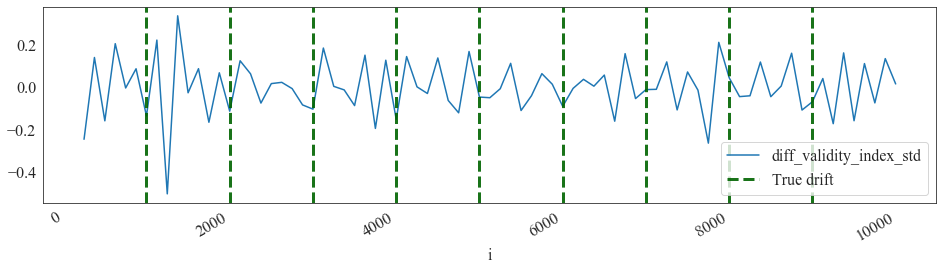

diff_inter_dist_euclidean_mean


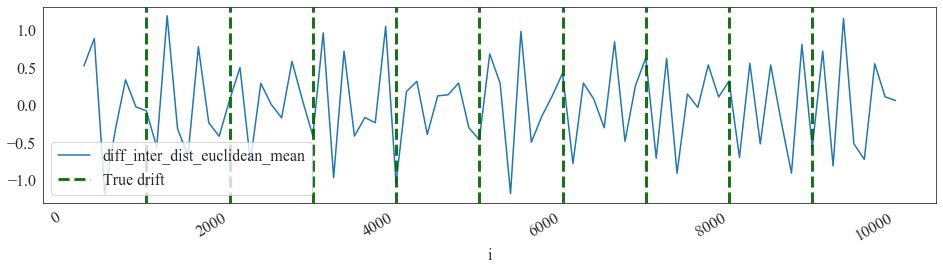

diff_inter_dist_euclidean_std


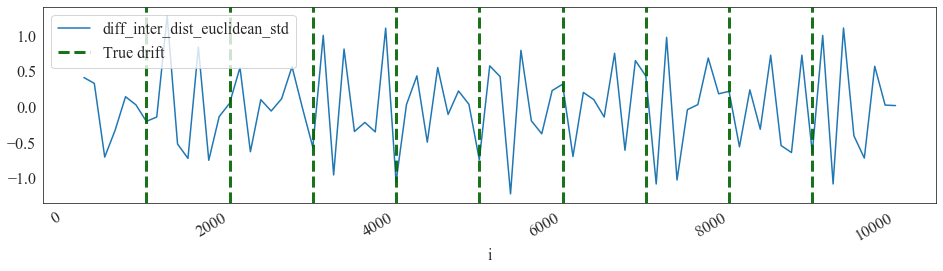

diff_inter_dist_euclidean_max


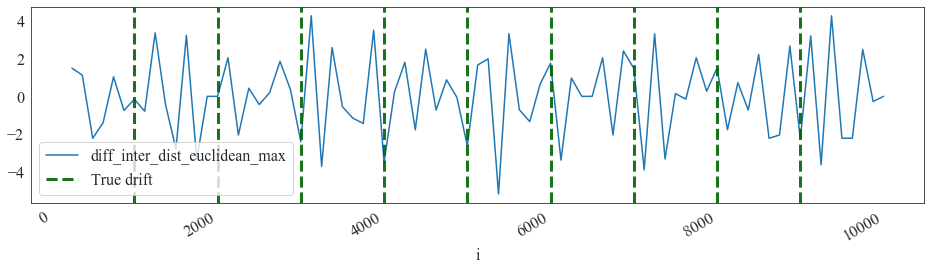

diff_inter_dist_correlation_mean


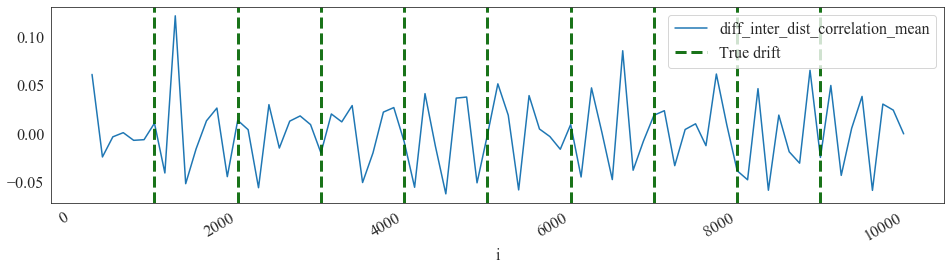

diff_inter_dist_correlation_std


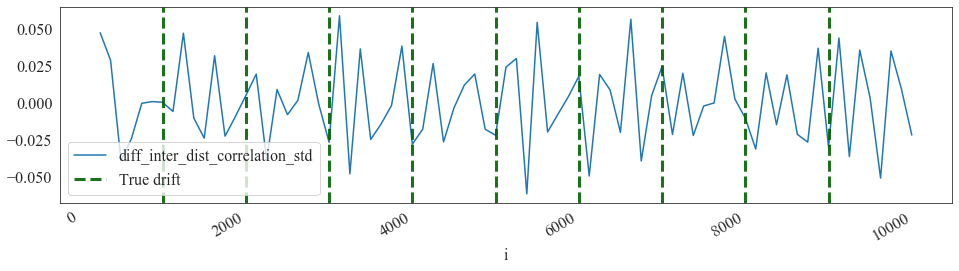

diff_inter_dist_correlation_max


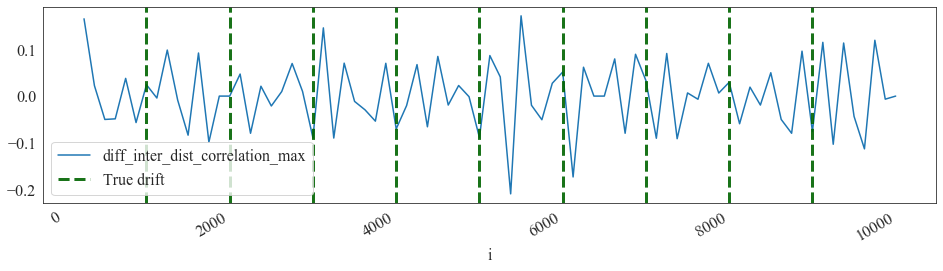

diff_inter_dist_hamming_mean


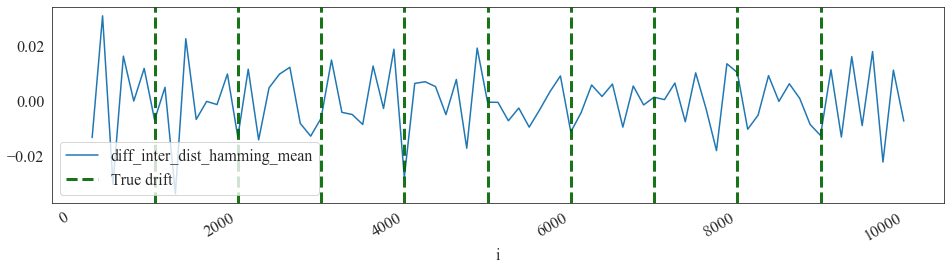

diff_inter_dist_hamming_std


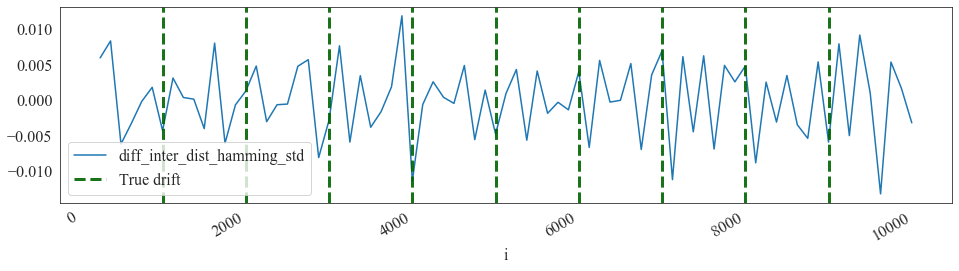

diff_inter_dist_hamming_max


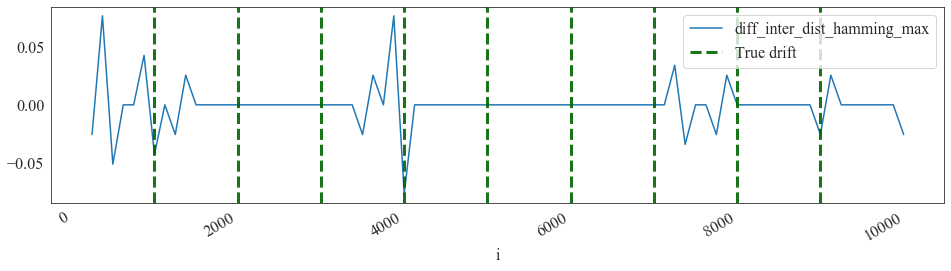

diff_inter_dist_jaccard_mean


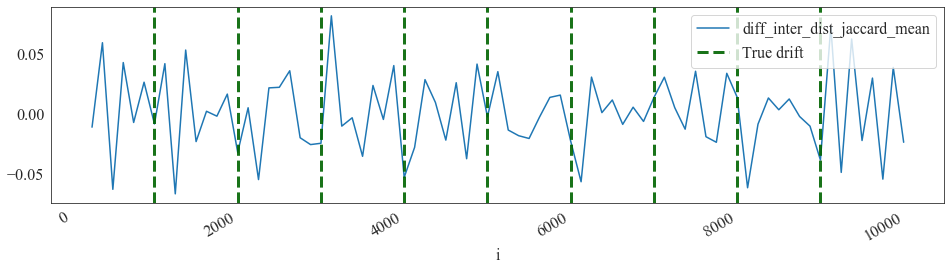

diff_inter_dist_jaccard_std


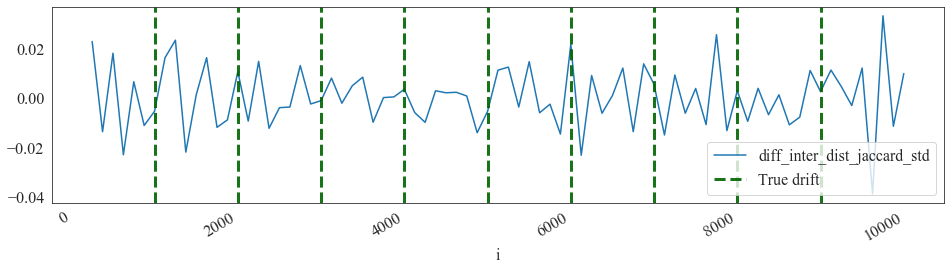

diff_inter_dist_jaccard_max


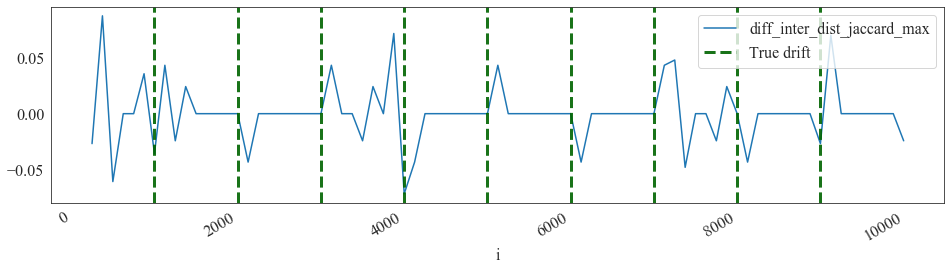

diff_inter_dist_cosine_mean


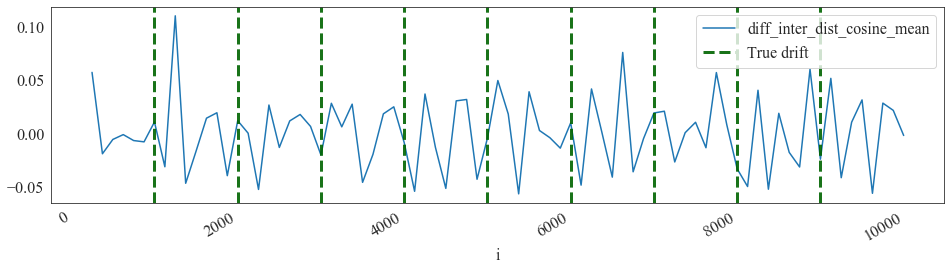

diff_inter_dist_cosine_std


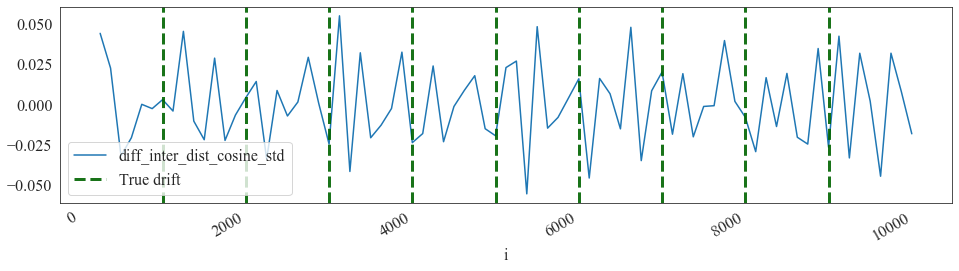

diff_inter_dist_cosinen_max


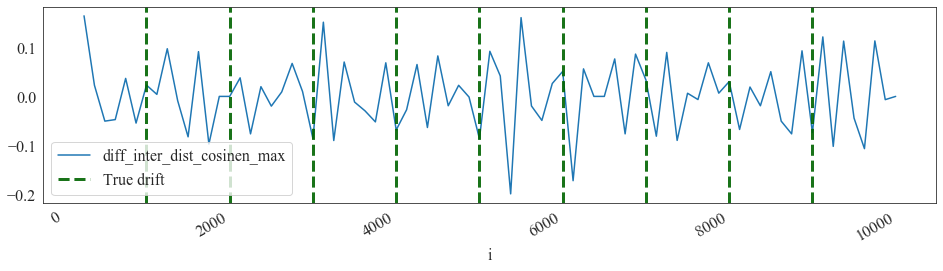

diff_inter_dist_cityblock_mean


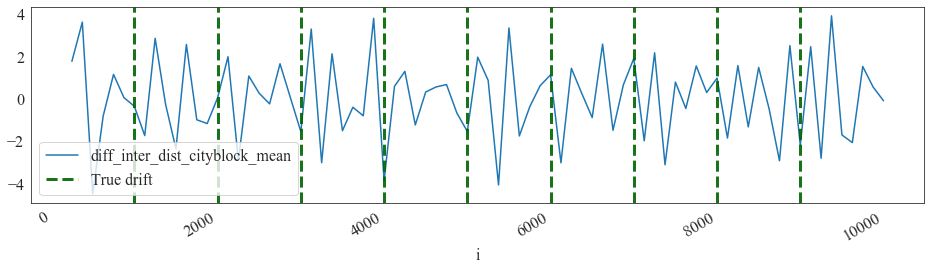

diff_inter_dist_cityblock_std


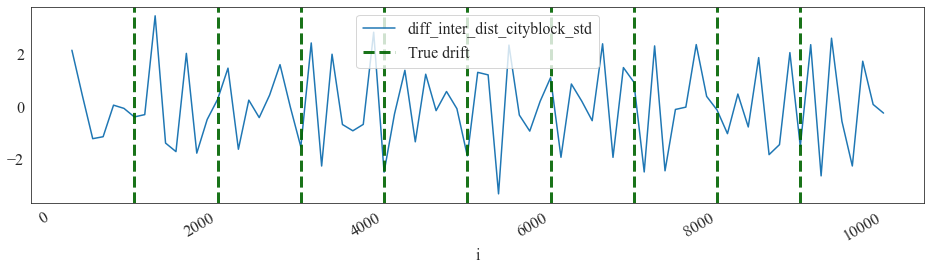

diff_inter_dist_cityblock_max


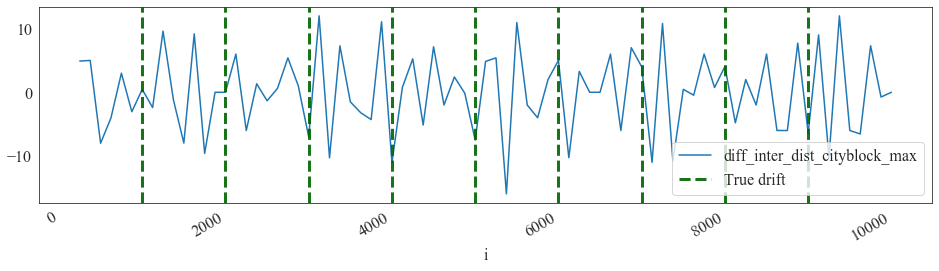

mean_diff_radius


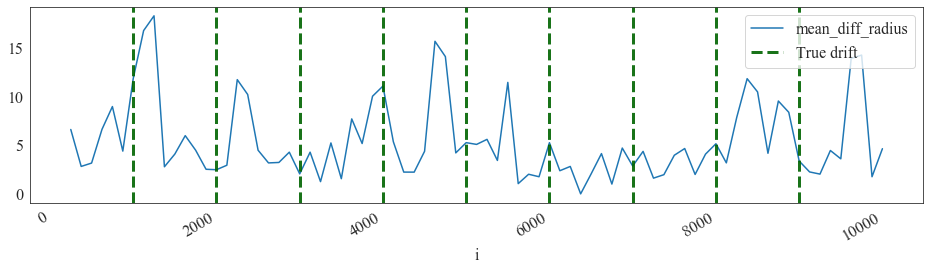

std_diff_radius


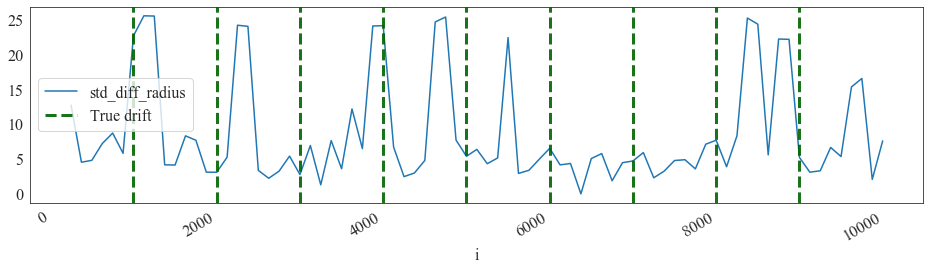

mean_diff_dist_intra_cluster


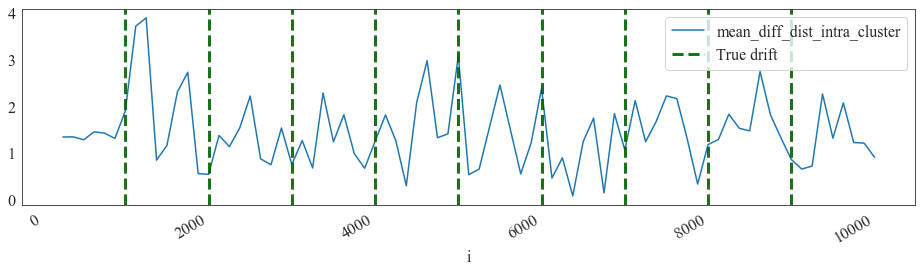

std_diff_dist_intra_cluster


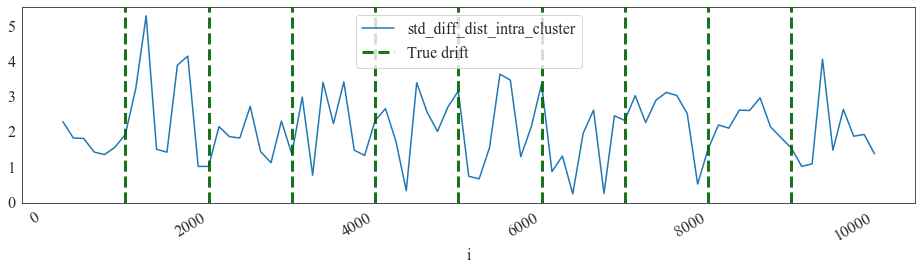

mean_diff_skewness


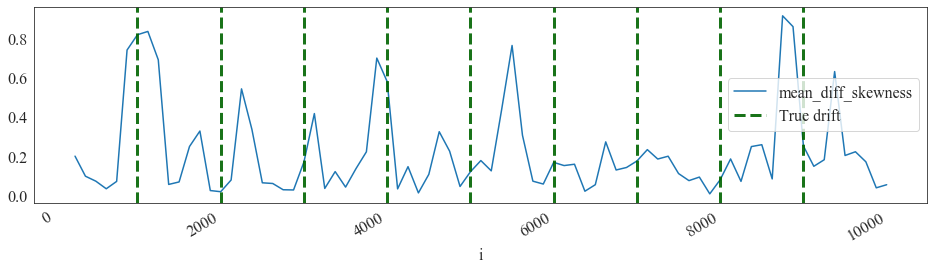

std_diff_skewness


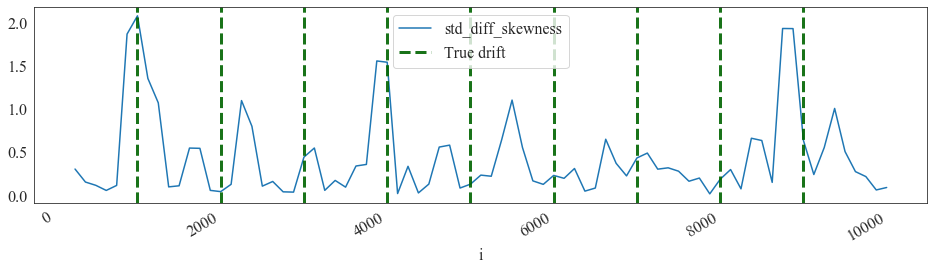

mean_diff_cluster_std


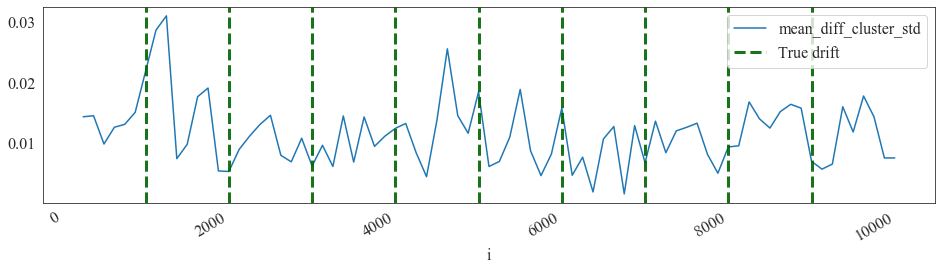

std_diff_cluster_std


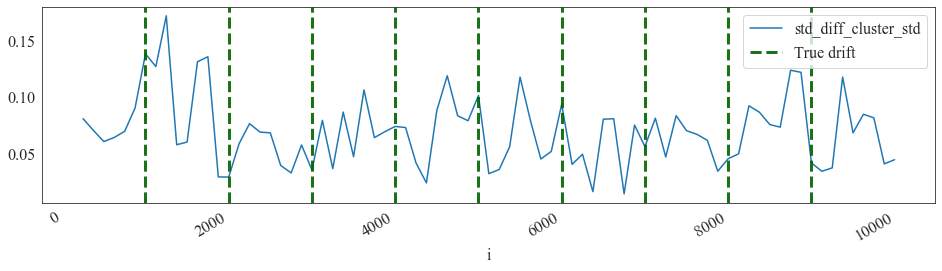

mean_diff_wcss


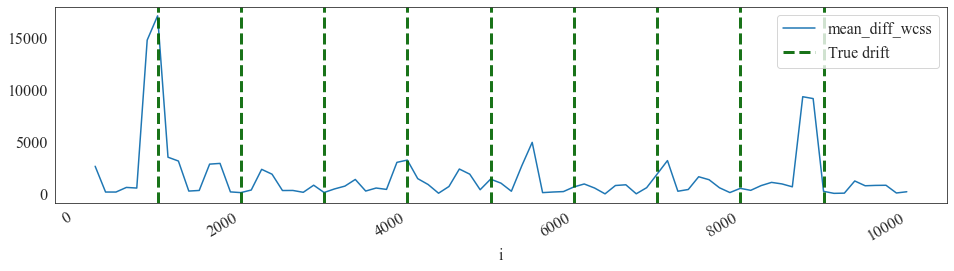

std_diff_wcss


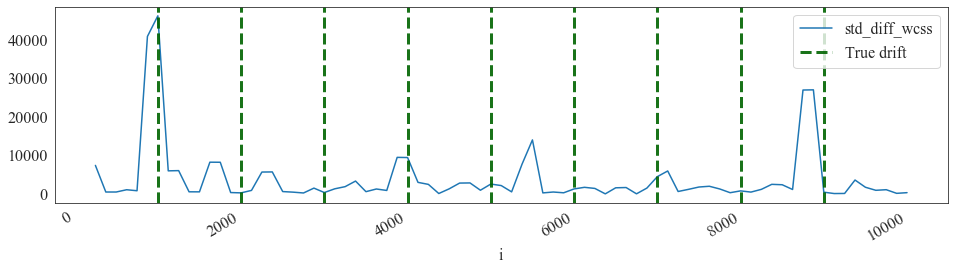

diff_radius_mean


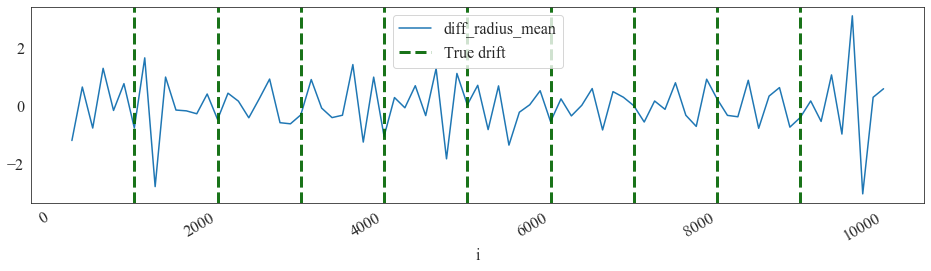

diff_radius_std


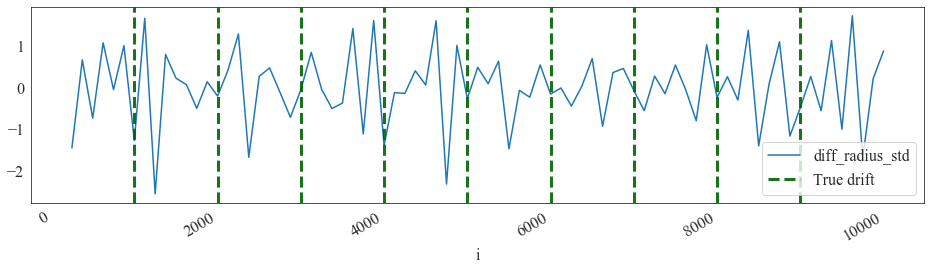

diff_radius_sum


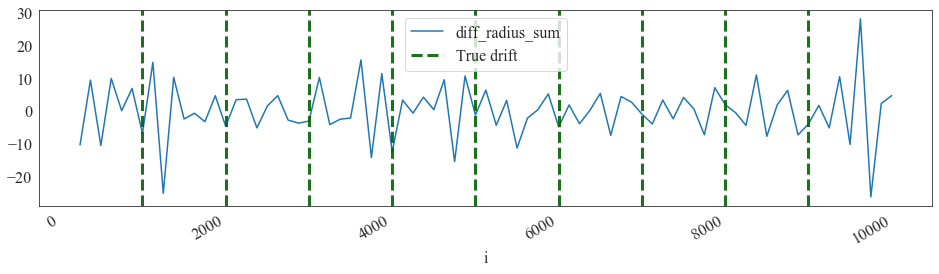

diff_dist_intra_cluster_mean


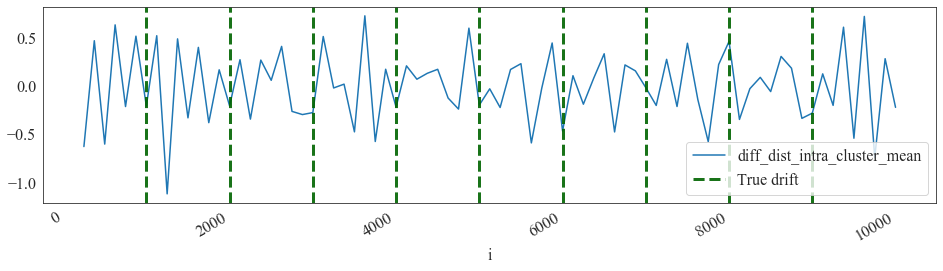

diff_dist_intra_cluster_std


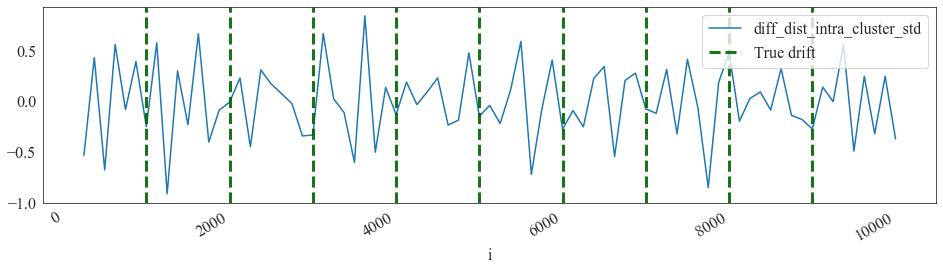

diff_dist_intra_cluster_sum


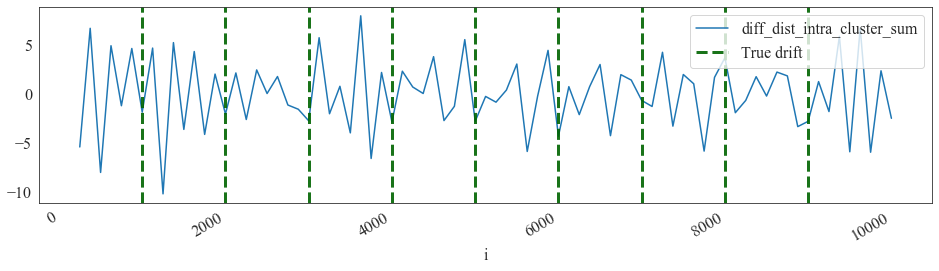

diff_cluster_std_mean


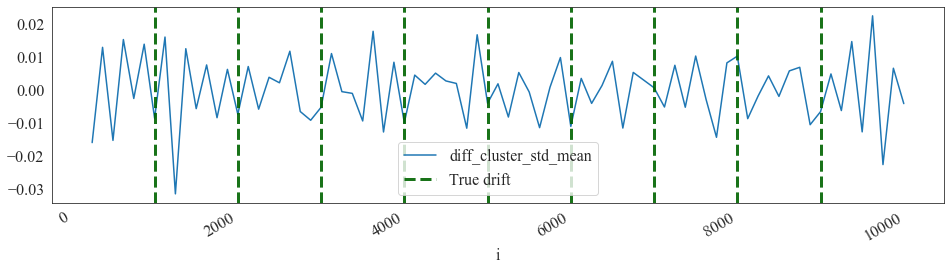

diff_cluster_std_std


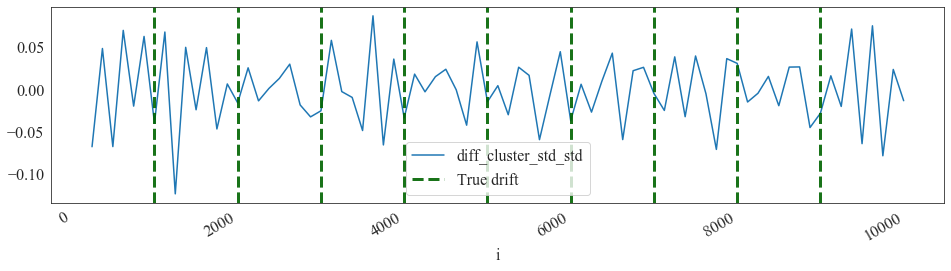

diff_cluster_std_sum


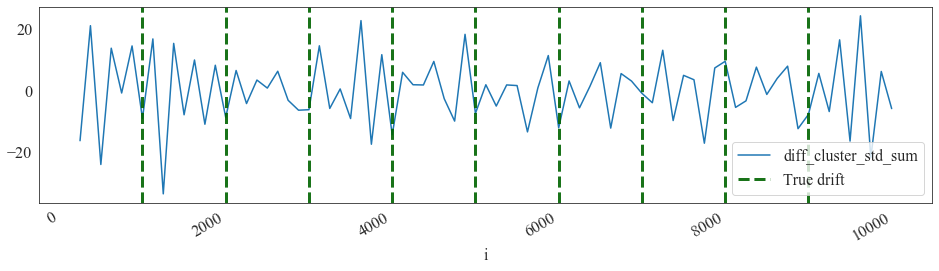

diff_skewness_mean


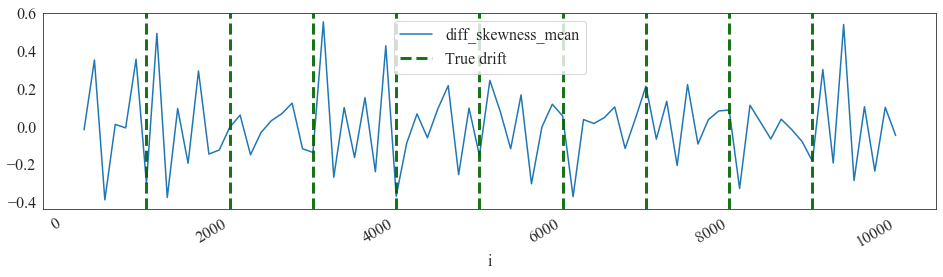

diff_skewness_std


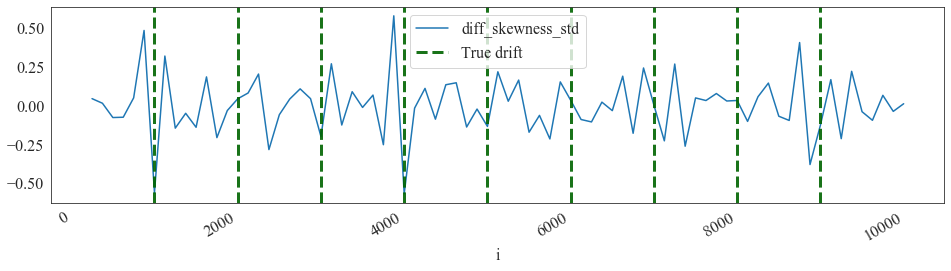

diff_skewness_sum


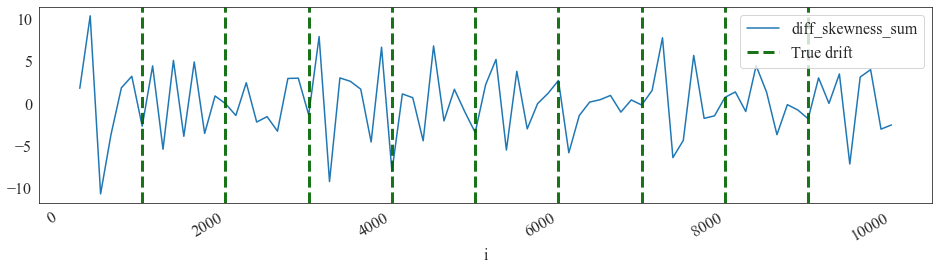

diff_wcss_mean


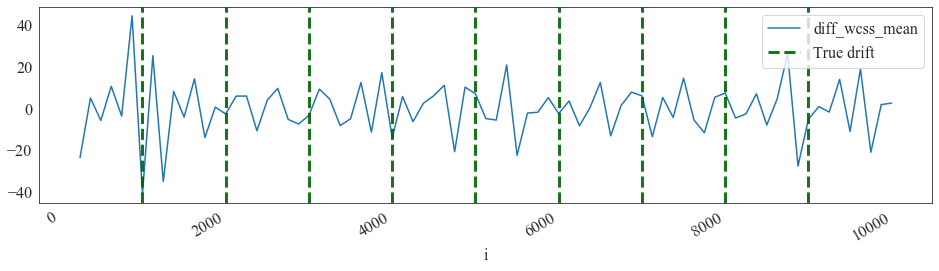

diff_wcss_std


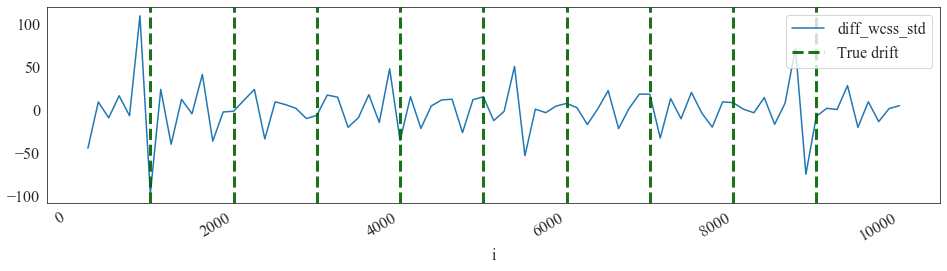

diff_wcss_sum


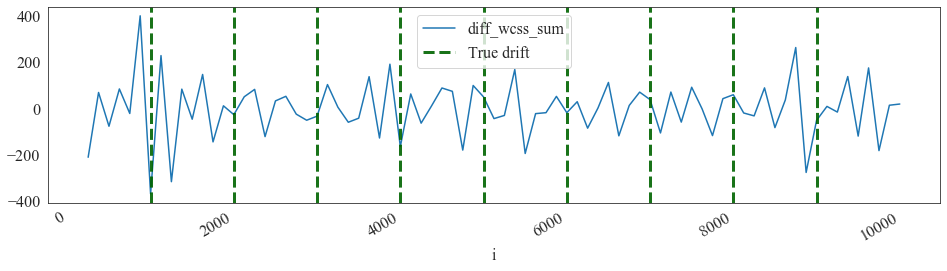

In [55]:
for i in run_df.columns:
    print(i)
    try:
        run_df[i].plot(figsize=(16,4),subplots=True)
        plts.plot_drift_vertical_lines(len(activity_binary), label="True drift")
        plt.legend()
        plt.show()
    except:
        pass

### Drift Detection

In [ ]:
# metric = "avg_cluster_std"
metric = "diff_cluster_std"
# metric= "k"

drifts, not_drifts,  info = dd.detect_concept_drift(
    run_df,
    metric,
    rolling_window=3,
    std_tolerance=3,
    min_tol=0.003,
    verbose=False
)

dd.get_metrics(drifts, not_drifts, y_true, window_size=clustering_window_size)

In [ ]:
plts.plot_deteccao_drift(
    run_df,
    metric,
    drifts,
    y_true,
    info['means'],
    info['lowers'],
    info['uppers'],
    save_png=""
)

### Drift Localization

In [ ]:
dl.localize_drift(
    run_df.centroids.loc[500], 
    run_df.centroids.loc[625], 
    activity_binary.columns
)

In [ ]:
# Result of drift localization in the ground truth drifts

dl.localize_all_drifts(
    run_df,
    [x + clustering_window_size for x in y_true], 
    clustering_window_size,
    activity_binary.columns
)

In [ ]:
# Result of drift localization in all predicted drifts

dl.localize_all_drifts(
    run_df,
    drifts, 
    clustering_window_size,
    activity_binary.columns
)